# EMG PAIRPLOTS

In [9]:
# EMG, and other peripheral signal recognition of affect
import numpy as np
import signalpreprocess as sp
import cPickle
import math

# For the SVM
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib as plt
from sklearn import metrics
from sklearn import tree


###################################################################################
############################### Load Dataset ######################################
###################################################################################

# Data loader edition
X, y = cPickle.load(open('deap_data/peripheral_data.dat', 'rb'))
y_valence = np.array(sp.data_binarizer([el[0] for el in y],5))
y_arousal = np.array(sp.data_binarizer([el[1] for el in y],5))
y_dominance = np.array(sp.data_binarizer([el[2] for el in y],5))

X = np.array(X)
y = np.array(y)

# Describe the data
valencepd = pd.Categorical(y_valence)
arousalpd = pd.Categorical(y_arousal)
dominancepd = pd.Categorical(y_dominance)
print (valencepd.describe())
print (arousalpd.describe())
print (dominancepd.describe())

pca = PCA(n_components=8)
pca_result = pca.fit_transform(X)
print 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)


            counts     freqs
categories                  
0              550  0.454921
1              659  0.545079
            counts     freqs
categories                  
0              521  0.430935
1              688  0.569065
            counts     freqs
categories                  
0              490  0.405294
1              719  0.594706
Explained variation per principal component: [ 0.54845046  0.13772725  0.09512081  0.07157712  0.06031275  0.04543812
  0.02307704  0.01223725]


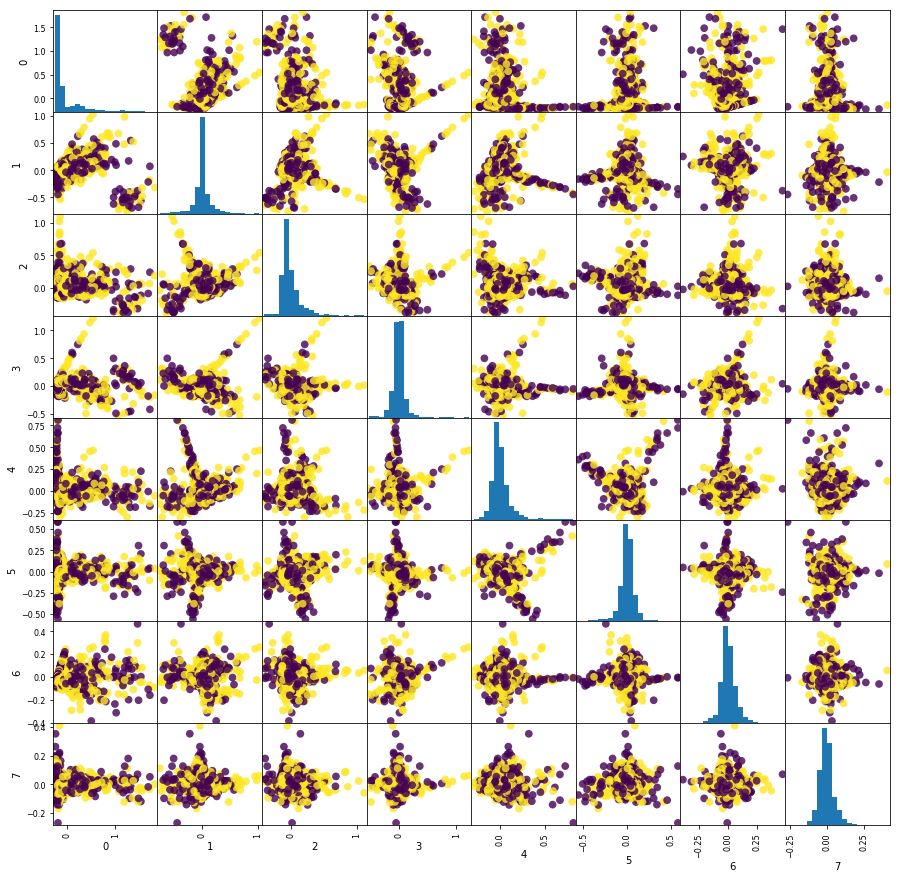

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x_df = pd.DataFrame(pca_result)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(x_df, c=y_valence, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

# EEG PAIRPLOTS

In [11]:
###################################################################################
############################### Load Dataset ######################################
###################################################################################

# Data loader edition
X, y = cPickle.load(open('deap_data/eeg_data.dat', 'rb'))
y_valence = np.array(sp.data_binarizer([el[0] for el in y],5))
y_arousal = np.array(sp.data_binarizer([el[1] for el in y],5))
y_dominance = np.array(sp.data_binarizer([el[2] for el in y],5))

X = np.array(X)
y = np.array(y)

pca = PCA(n_components=8)
pca_result = pca.fit_transform(X)
print 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)

Explained variation per principal component: [ 0.70953768  0.16127434  0.08189489  0.03050646  0.0098266   0.00459957
  0.00149632  0.00086414]


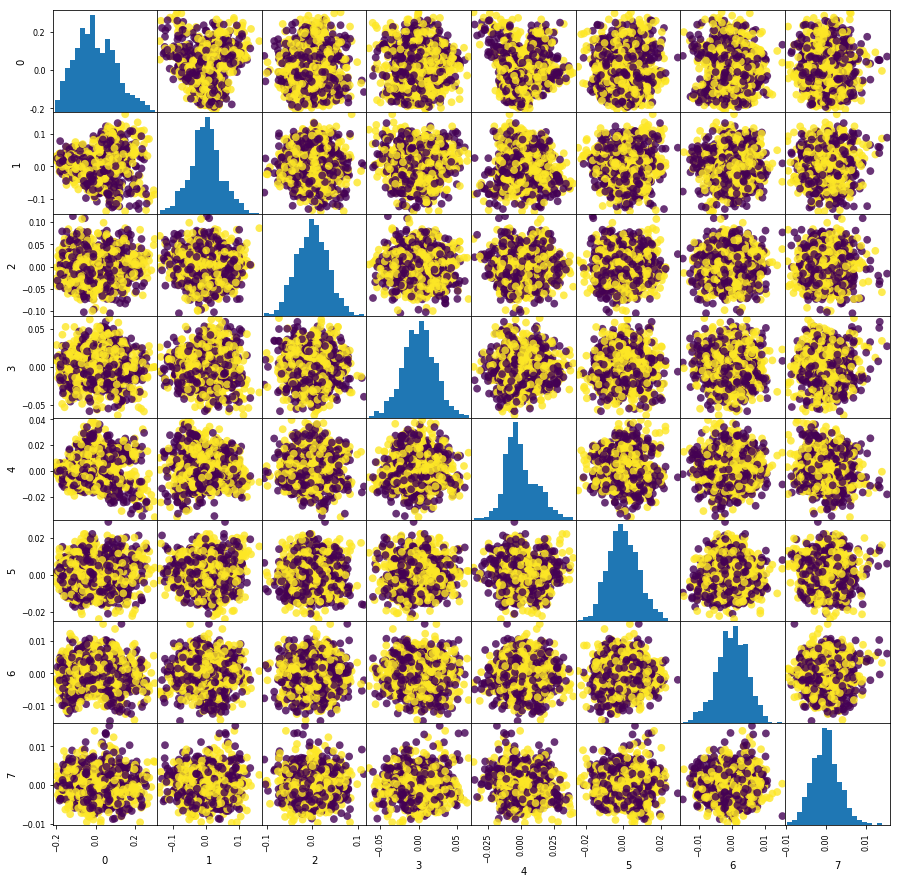

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x_df = pd.DataFrame(pca_result)

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(x_df, c=y_valence, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)